In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
import plotly.graph_objects as go
import plotly.express as px

In [4]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [5]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [6]:
dataset_oae = (r'/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/CO2flux_Baseline_2.6_cropped.nc')
data_baseline = xr.open_dataset(dataset_oae)

In [7]:
dataset_oae = (r'/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/CO2flux_OAE_2.6_cropped.nc')
data_oae = xr.open_dataset(dataset_oae)

In [8]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [9]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [10]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [11]:
co2flux_max_base = dataframe_base.resample(time_counter='AS').max('time_counter')
co2flux_max_base = dataframe_base.groupby('time_counter.year').max('time_counter')

In [12]:
co2flux_min_base = dataframe_base.resample(time_counter='AS').min('time_counter')
co2flux_min_base = dataframe_base.groupby('time_counter.year').min('time_counter')

In [13]:
co2flux_amplitude_base = co2flux_max_base['co2flux_cpl'] - co2flux_min_base['co2flux_cpl']

In [14]:
co2flux_amplitude_base = co2flux_amplitude_base.to_dataset()

In [15]:
co2flux_amplitude_base = co2flux_amplitude_base.co2flux_cpl.mean(dim=('year'))

In [16]:
co2flux_amplitude_base = co2flux_amplitude_base.to_dataset()

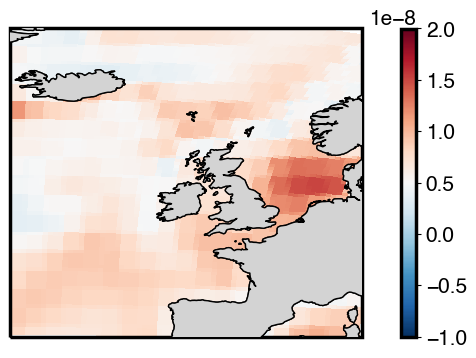

In [68]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

co2flux_amplitude_base.co2flux_cpl.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True, add_labels=False, 
    vmin = -0.00000001, vmax = 0.00000002, 
    cmap="RdBu_r"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

In [29]:
co2flux_max_oae = dataframe_oae.resample(time_counter='AS').max('time_counter')
co2flux_max_oae = dataframe_oae.groupby('time_counter.year').max('time_counter')

In [30]:
co2flux_min_oae = dataframe_oae.resample(time_counter='AS').min('time_counter')
co2flux_min_oae = dataframe_oae.groupby('time_counter.year').min('time_counter')

In [31]:
co2flux_amplitude_oae = co2flux_max_oae['co2flux_cpl'] - co2flux_min_oae['co2flux_cpl']

In [32]:
co2flux_amplitude_oae = co2flux_amplitude_oae.to_dataset()

In [33]:
co2flux_amplitude_oae = co2flux_amplitude_oae.co2flux_cpl.mean(dim=('year'))

In [34]:
co2flux_amplitude_oae = co2flux_amplitude_oae.to_dataset()

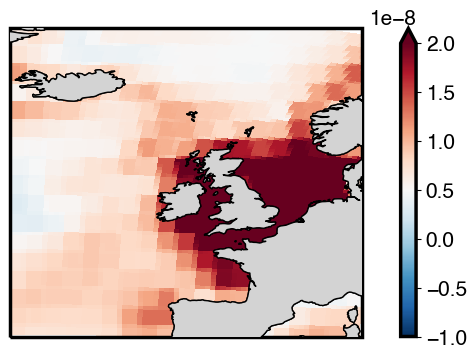

In [69]:
fig = plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

co2flux_amplitude_oae.co2flux_cpl.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True, add_labels=False, 
    vmin = -0.00000001, vmax = 0.00000002, 
    cmap="RdBu_r", 
)

ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

In [44]:
dataframe_base_map = data_baseline.sel(time_counter=slice('2025', '2100'))

In [45]:
dataframe_oae_map = data_oae.sel(time_counter=slice('2025', '2100'))

In [46]:
co2flux_max_base_map = dataframe_base_map.resample(time_counter='AS').max('time_counter')
co2flux_max_base_map = dataframe_base_map.groupby('time_counter.year').max('time_counter')

In [47]:
co2flux_min_base_map = dataframe_base_map.resample(time_counter='AS').min('time_counter')
co2flux_min_base_map = dataframe_base_map.groupby('time_counter.year').min('time_counter')

In [48]:
co2flux_amplitude_base_map = co2flux_max_base_map['co2flux_cpl'] - co2flux_min_base_map['co2flux_cpl']

In [49]:
co2flux_amplitude_base_map = co2flux_amplitude_base_map.to_dataset()

In [50]:
co2flux_max_oae_map = dataframe_oae_map.resample(time_counter='AS').max('time_counter')
co2flux_max_oae_map = dataframe_oae_map.groupby('time_counter.year').max('time_counter')

In [51]:
co2flux_min_oae_map = dataframe_oae_map.resample(time_counter='AS').min('time_counter')
co2flux_min_oae_map = dataframe_oae_map.groupby('time_counter.year').min('time_counter')

In [52]:
co2flux_amplitude_oae_map = co2flux_max_oae_map['co2flux_cpl'] - co2flux_min_oae_map['co2flux_cpl']

In [53]:
co2flux_amplitude_oae_map = co2flux_amplitude_oae_map.to_dataset()

In [55]:
co2flux_amplitude_base_average = (co2flux_amplitude_base_map.co2flux_cpl.mean(dim=('y', 'x'))).to_dataset()

In [56]:
co2flux_amplitude_oae_average = (co2flux_amplitude_oae_map.co2flux_cpl.mean(dim=('y', 'x'))).to_dataset()

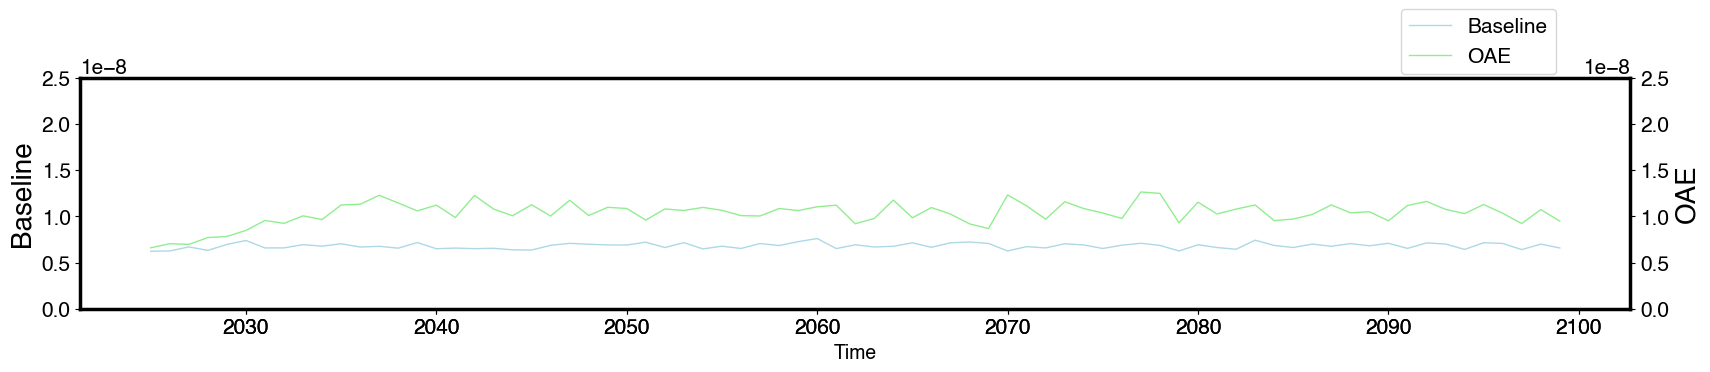

In [62]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(co2flux_amplitude_base_average.year, co2flux_amplitude_base_average.co2flux_cpl, linewidth=1, color="lightblue", label = 'Baseline')
ax.set_ylabel('Baseline')
ax.set_ylim(0, 0.000000025)

ax2.plot(co2flux_amplitude_oae_average.year, co2flux_amplitude_oae_average.co2flux_cpl, linewidth=1, color="lightgreen", label = 'OAE')
ax2.set_ylabel('OAE')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylim(0, 0.000000025)

plt.xlabel("Time", fontsize=14)

plt.title('', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()